# Importing packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Loading the dataset

In [6]:
df = pd.read_csv('~/Data/employee_retention_data.csv')

In [7]:
df.head(4)

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,quit_yn,end_date
0,13021.0,7,customer_service,28,89000.0,3/24/14,10/30/15,1,10/30/15
1,825355.0,7,marketing,20,183000.0,4/29/13,4/4/14,1,4/4/14
2,927315.0,4,marketing,14,101000.0,10/13/14,NaN,0,12/13/15
3,662910.0,7,customer_service,20,115000.0,5/14/12,6/7/13,1,6/7/13


Note that I've added a few helpful columns here: 'quit_yn' and 'end_date'

## Going to get durations for each subject

In [8]:
df.dtypes

employee_id    float64
company_id       int64
dept            object
seniority        int64
salary         float64
join_date       object
quit_date       object
quit_yn          int64
end_date        object
dtype: object

Note that the date related columns are not treated like dates right now

In [9]:
# Converting the data into datetime 
df['JOIN_DATE'] = pd.to_datetime(df['join_date'])
df['QUIT_DATE'] = pd.to_datetime(df['quit_date'])
df['END_DATE'] = pd.to_datetime(df['end_date'])

In [10]:
df['Duration'] = df['END_DATE'] - df['JOIN_DATE'] 

In [11]:
df.dtypes

employee_id            float64
company_id               int64
dept                    object
seniority                int64
salary                 float64
join_date               object
quit_date               object
quit_yn                  int64
end_date                object
JOIN_DATE       datetime64[ns]
QUIT_DATE       datetime64[ns]
END_DATE        datetime64[ns]
Duration       timedelta64[ns]
dtype: object

Now they are treated like datetimes

# Let's look at employee survival at different companies

### Defining quitting cases and sensored cases

Making use of the extra column I created in excel: quit_yn

In [13]:
# defining events: True = quit, False = still at job
events = df['quit_yn'] == 1

# Have a look at 1st 3 rows
events[:3]

0     True
1     True
2    False
Name: quit_yn, dtype: bool

### Defining survivial times

Making use of the Durations column I generated

In [15]:
# Converting the datetime object to # of days
survival_times = df['Duration'].astype('timedelta64[D]')

# Have a look at 1st 3 rows
survival_times[:3]

0    585.0
1    340.0
2    426.0
Name: Duration, dtype: float64

### Adding these useful new measures back to the main data frame for later use

In [16]:
# Add the Survive variable to df
df['Survive'] = events

In [17]:
# Add the survival times variable to df
df['Times'] = survival_times

In [28]:
# Having a look at the dataframe
df.head(3)

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,quit_yn,end_date,JOIN_DATE,QUIT_DATE,END_DATE,Duration,Survive,Times
0,13021.0,7,customer_service,28,89000.0,3/24/14,10/30/15,1,10/30/15,2014-03-24,2015-10-30,2015-10-30,585 days,True,585.0
1,825355.0,7,marketing,20,183000.0,4/29/13,4/4/14,1,4/4/14,2013-04-29,2014-04-04,2014-04-04,340 days,True,340.0
2,927315.0,4,marketing,14,101000.0,10/13/14,NaN,0,12/13/15,2014-10-13,NaT,2015-12-13,426 days,False,426.0


### Importing the package for survival analysi

In [18]:
from lifelines import KaplanMeierFitter

### Let's look at the overall patter of survival across all companies, departments, pay grades, and levels of senority

This is the highest level picture of the data

In [22]:
# defing the function
kmf = KaplanMeierFitter()

#Add parameters in to fit the actual model
kmf.fit(survival_times, event_observed=events)

<lifelines.KaplanMeierFitter: fitted with 24702 observations, 11192 censored>

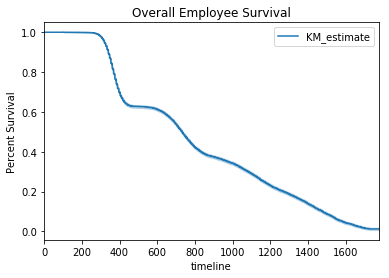

In [26]:
# Plot the survivial curve
kmf.plot()
plt.ylabel('Percent Survival')
plt.title('Overall Employee Survival')

Out of curiosity, what do the durations of employment look like? Does it make sense given this survival curve?

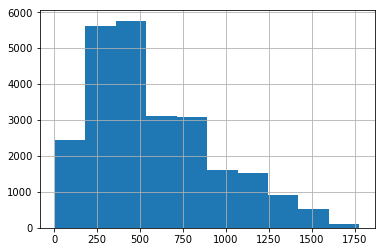

In [29]:
#Plot distribution of employee working durations
df['Times'].hist()

Most employees work at a company for between 250-500 days which corresponds to the what the survival function suggests

## Takeaway number 1: 

Without seperating anything out ~ 100% of employees stay for around 1yr and then there is a sharp decline after the 1st year where ~ 40% of employees leave. After this, there is a relativley stable rate of leaving over the next several years of about 20% / year

# Comparing survival rates across different companies

In [31]:
# Brute force: seperating data out for different companies:
df_1 = df[df['company_id'] == 1]
df_2 = df[df['company_id'] == 2]
df_3 = df[df['company_id'] == 3]
df_4 = df[df['company_id'] == 4]
df_5 = df[df['company_id'] == 5]
df_6 = df[df['company_id'] == 6]
df_7 = df[df['company_id'] == 7]
df_8 = df[df['company_id'] == 8]
df_9 = df[df['company_id'] == 9]
df_10 = df[df['company_id'] == 10]
df_11 = df[df['company_id'] == 11]
df_12 = df[df['company_id'] == 12]

### defining event and survival time variables

In [32]:
events1 = df_1['Survive']
events2 = df_2['Survive']
events3 = df_3['Survive']
events4 = df_4['Survive']
events5 = df_5['Survive']
events6 = df_6['Survive']
events7 = df_7['Survive']
events8 = df_8['Survive']
events9 = df_9['Survive']
events10 = df_10['Survive']
events11 = df_11['Survive']
events12 = df_12['Survive']

times1 = df_1['Times']
times2 = df_2['Times']
times3 = df_3['Times']
times4 = df_4['Times']
times5 = df_5['Times']
times6 = df_6['Times']
times7 = df_7['Times']
times8 = df_8['Times']
times9 = df_9['Times']
times10 = df_10['Times']
times11 = df_11['Times']
times12 = df_12['Times']

In [33]:
kmf_1 = KaplanMeierFitter()
kmf_2 = KaplanMeierFitter()
kmf_3 = KaplanMeierFitter()
kmf_4 = KaplanMeierFitter()
kmf_5 = KaplanMeierFitter()
kmf_6 = KaplanMeierFitter()
kmf_7 = KaplanMeierFitter()
kmf_8 = KaplanMeierFitter()
kmf_9 = KaplanMeierFitter()
kmf_10 = KaplanMeierFitter()
kmf_11 = KaplanMeierFitter()
kmf_12 = KaplanMeierFitter()

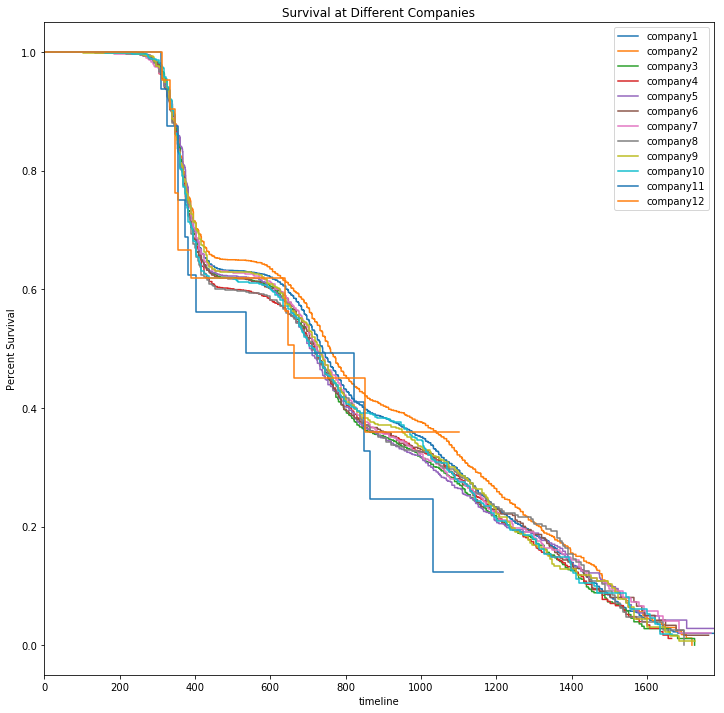

In [34]:
plt.figure(figsize=(12,12))
ax = plt.subplot(111)
ax = kmf_1.fit(times1, event_observed=events1,label='company1').plot(ax=ax,ci_show=False)
ax = kmf_2.fit(times2, event_observed=events2,label='company2').plot(ax=ax,ci_show=False)
ax = kmf_3.fit(times3, event_observed=events3,label='company3').plot(ax=ax,ci_show=False)
ax = kmf_4.fit(times4, event_observed=events4,label='company4').plot(ax=ax,ci_show=False)
ax = kmf_5.fit(times5, event_observed=events5,label='company5').plot(ax=ax,ci_show=False)
ax = kmf_6.fit(times6, event_observed=events6,label='company6').plot(ax=ax,ci_show=False)
ax = kmf_7.fit(times7, event_observed=events7,label='company7').plot(ax=ax,ci_show=False)
ax = kmf_8.fit(times8, event_observed=events8,label='company8').plot(ax=ax,ci_show=False)
ax = kmf_9.fit(times9, event_observed=events9,label='company9').plot(ax=ax,ci_show=False)
ax = kmf_10.fit(times10, event_observed=events10,label='company10').plot(ax=ax,ci_show=False)
ax = kmf_11.fit(times11, event_observed=events11,label='company11').plot(ax=ax,ci_show=False)
ax = kmf_12.fit(times12, event_observed=events12,label='company12').plot(ax=ax,ci_show=False)
plt.ylabel('Percent Survival')
plt.title('Survival at Different Companies')

### Takeaway Number 2:

Overall, threre is very little difference in the overall pattern of survival across the different companies... All follow the same pattern described about (~40% employee loss after 1 year)

Most discrepant companies are the ones with the fewest employees in this dataset, # 11 and 12 (See histogram below)

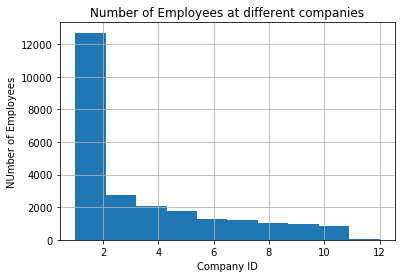

In [36]:
df['company_id'].hist()
plt.xlabel('Company ID')
plt.ylabel('NUmber of Employees')
plt.title('Number of Employees at different companies')

# Comparing survival rates across different departments

### Getting data for each different department

In [43]:
# Brute force 
df_customer_service = df[df['dept'] == 'customer_service']
df_data_science = df[df['dept'] == 'data_science']
df_design = df[df['dept'] == 'design']
df_engineer = df[df['dept'] == 'engineer']
df_marketing = df[df['dept'] == 'marketing']
df_sales = df[df['dept'] == 'sales']

In [44]:
# Defining events and survival times
events_cust = df_customer_service['Survive']
events_data = df_data_science['Survive']
events_design = df_design['Survive']
events_engineer = df_engineer['Survive']
events_marketing = df_marketing['Survive']
events_sales = df_sales['Survive']

times_cust = df_customer_service['Times']
times_data = df_data_science['Times']
times_design = df_design['Times']
times_engineer = df_engineer['Times']
times_marketing = df_marketing['Times']
times_sales = df_sales['Times']

In [45]:
# Defining the model
kmf_cust = KaplanMeierFitter()
kmf_data = KaplanMeierFitter()
kmf_design = KaplanMeierFitter()
kmf_engineer = KaplanMeierFitter()
kmf_marketing = KaplanMeierFitter()
kmf_sales = KaplanMeierFitter()

### Plotting survival by department type

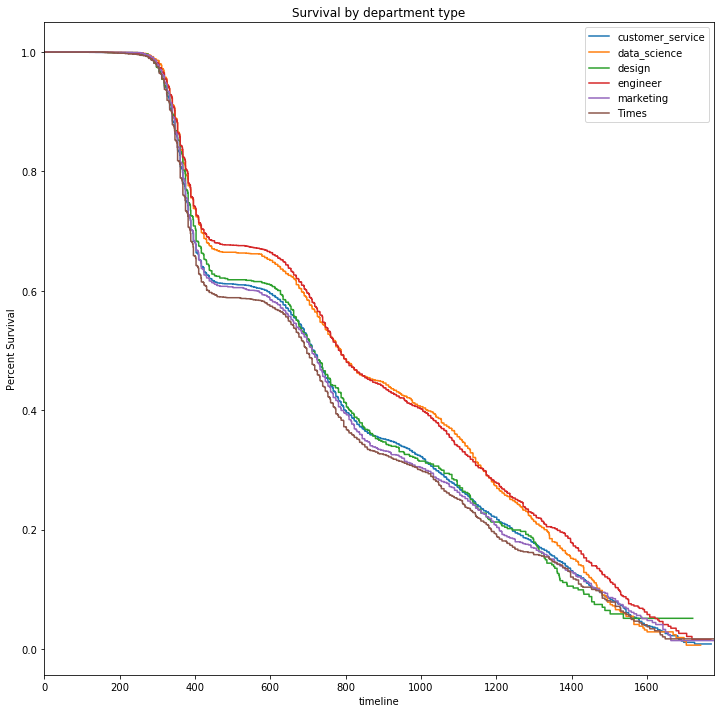

In [46]:
plt.figure(figsize=(12,12))
ax = plt.subplot(111)

ax = kmf_cust.fit(times_cust, event_observed = events_cust, label = 'customer_service').plot(ax=ax,ci_show=False)
ax = kmf_data.fit(times_data, event_observed = events_data,label = 'data_science').plot(ax=ax,ci_show=False)
ax = kmf_design.fit(times_design, event_observed = events_design,label = 'design').plot(ax=ax,ci_show=False)
ax = kmf_engineer.fit(times_engineer, event_observed = events_engineer,label = 'engineer').plot(ax=ax,ci_show=False)
ax = kmf_marketing.fit(times_marketing, event_observed = events_marketing,label = 'marketing').plot(ax=ax,ci_show=False)
ax = kmf_sales.fit(times_sales, event_observed = events_sales,label = 'Times').plot(ax=ax,ci_show=False)

plt.ylabel('Percent Survival')
plt.title('Survival by department type')

### Takeaway Number 3:

All departments follow the same overall patter described above. Datascience and engineering loose slightly less employees during the 1st year drop off, but then rates of loss are ~ to other departments thereafter 

# Comparing Survival Rates at different senority levels

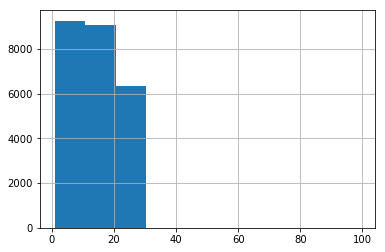

In [48]:
df['seniority'].hist()

Must be a few outliers values here...

In [49]:
df['seniority'].describe()

count    24702.000000
mean        14.127803
std          8.089520
min          1.000000
25%          7.000000
50%         14.000000
75%         21.000000
max         99.000000
Name: seniority, dtype: float64

##  Breaking senority up in 5 year buckets

In [50]:
# getting the data
df_sen0_5 = df[(df['seniority'] > 0) & (df['seniority'] <=5)]
df_sen5_10 = df[(df['seniority'] > 5) & (df['seniority'] <=10)]
df_sen10_15 = df[(df['seniority'] > 10) & (df['seniority'] <=15)]
df_sen15_20 = df[(df['seniority'] > 15) & (df['seniority'] <=20)]
df_sen20_25 = df[(df['seniority'] > 20) & (df['seniority'] <=25)]
df_sen25_up = df[df['seniority'] > 25]

In [51]:
# Defining events and survival times
events_sen0_5 = df_sen0_5['Survive']
events_sen5_10 = df_sen5_10['Survive']
events_sen10_15 = df_sen10_15['Survive']
events_sen15_20 = df_sen15_20['Survive']
events_sen20_25 = df_sen20_25['Survive']
events_sen25_up = df_sen25_up['Survive']

times_sen0_5 = df_sen0_5['Times']
times_sen5_10 = df_sen5_10['Times']
times_sen10_15 = df_sen10_15['Times']
times_sen15_20 = df_sen15_20['Times']
times_sen20_25 = df_sen20_25['Times']
times_sen25_up = df_sen25_up['Times']

In [53]:
#Defining the models
kmf_sen0_5 = KaplanMeierFitter()
kmf_sen5_10 = KaplanMeierFitter()
kmf_sen10_15 = KaplanMeierFitter()
kmf_sen15_20 = KaplanMeierFitter()
kmf_sen20_25 = KaplanMeierFitter()
kmf_sen25_up = KaplanMeierFitter()

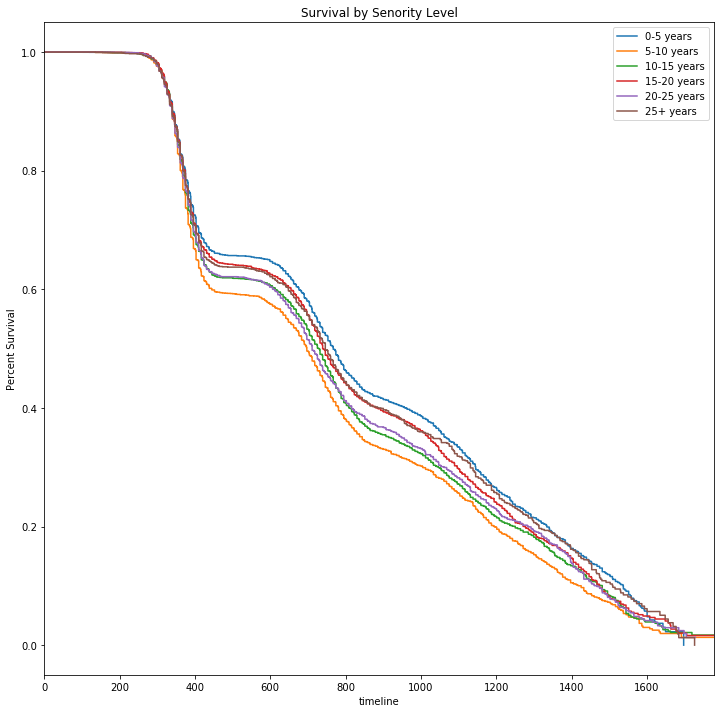

In [54]:
# Plotting the data
plt.figure(figsize=(12,12))
ax = plt.subplot(111)

ax = kmf_sen0_5.fit(times_sen0_5, event_observed = events_sen0_5, label = '0-5 years').plot(ax=ax,ci_show=False)
ax = kmf_sen5_10.fit(times_sen5_10, event_observed = events_sen5_10,label = '5-10 years').plot(ax=ax,ci_show=False)
ax = kmf_sen10_15.fit(times_sen10_15, event_observed = events_sen10_15,label = '10-15 years').plot(ax=ax,ci_show=False)
ax = kmf_sen15_20.fit(times_sen15_20, event_observed = events_sen15_20,label = '15-20 years').plot(ax=ax,ci_show=False)
ax = kmf_sen20_25.fit(times_sen20_25, event_observed = events_sen20_25,label = '20-25 years').plot(ax=ax,ci_show=False)
ax = kmf_sen25_up.fit(times_sen25_up, event_observed = events_sen25_up,label = '25+ years').plot(ax=ax,ci_show=False)

plt.ylabel('Percent Survival')
plt.title('Survival by Senority Level')

## Takeaway Number 4:

Still, the overall patter as described above still holds regardless of senority. All senority levels have highly similar 1st year attrition rates, then they differ slightly thereafter

# Comparing Survival rates across different salary brakets

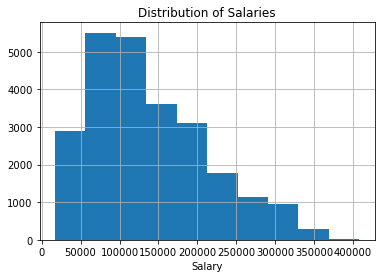

In [57]:
df['salary'].hist()
plt.xlabel('Salary')
plt.title('Distribution of Salaries')

In [55]:
df['salary'].describe()

count     24702.000000
mean     138183.345478
std       76058.184573
min       17000.000000
25%       79000.000000
50%      123000.000000
75%      187000.000000
max      408000.000000
Name: salary, dtype: float64

### Going to break salary up in 100K brakets

In [58]:
# Getting the data
df_sal0_100 = df[(df['salary'] > 0) & (df['salary'] <=100000)]
df_sal100_200 = df[(df['salary'] > 100000) & (df['salary'] <=200000)]
df_sal200_300 = df[(df['salary'] > 200000) & (df['salary'] <=300000)]
df_sal300_up = df[df['salary'] > 300000]

In [59]:
# Defining events and survival times
events_sal0_100 = df_sal0_100['Survive']
events_sal100_200 = df_sal100_200['Survive']
events_sal200_300 = df_sal200_300['Survive']
events_sal300_up = df_sal300_up['Survive']

times_sal0_100 = df_sal0_100['Times']
times_sal100_200 = df_sal100_200['Times']
times_sal200_300 = df_sal200_300['Times']
times_sal300_up = df_sal300_up['Times']

In [60]:
#Defining the model
kmf_sal0_100 = KaplanMeierFitter()
kmf_sal100_200 = KaplanMeierFitter()
kmf_sal200_300 = KaplanMeierFitter()
kmf_sal300_up = KaplanMeierFitter()

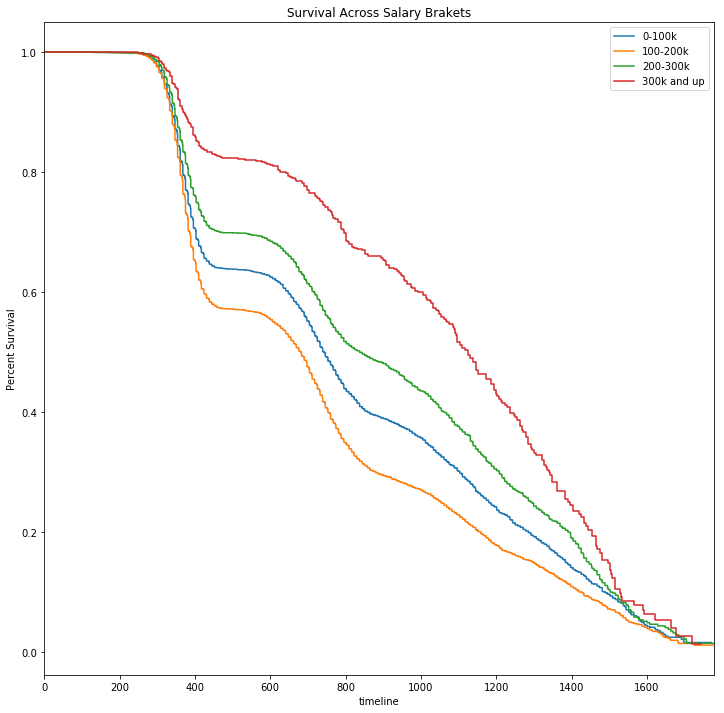

In [63]:
#Plotting the data
plt.figure(figsize=(12,12))
ax = plt.subplot(111)

ax = kmf_sal0_100.fit(times_sal0_100, event_observed = events_sal0_100, label = '0-100k').plot(ax=ax,ci_show=False)
ax = kmf_sal100_200.fit(times_sal100_200, event_observed = events_sal100_200,label = '100-200k').plot(ax=ax,ci_show=False)
ax = kmf_sal200_300.fit(times_sal200_300, event_observed = events_sal200_300,label = '200-300k').plot(ax=ax,ci_show=False)
ax = kmf_sal300_up.fit(times_sal300_up, event_observed = events_sal300_up,label = '300k and up').plot(ax=ax,ci_show=False)

plt.ylabel('Percent Survival')
plt.title('Survival Across Salary Brakets')

## Takeaway: Salary has biggest impact on survival rates

This factor above all of the others seems to impact rates of attrition after the first year. Highest paid employees don't leave at the same rates as others and 100K-200K leave at the highest rate compared to others in the first year

### Ran out of time here and have now spent more than 4 hrs on this....